In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV




In [4]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [5]:
df = pd.read_csv('df.csv')
df.head()

,brand,flavour,volume_per_joghurt_g,packsize,product_id,Unnamed: 0,date,price,units,weekday,weight
0,Mueller,blueberry,150,6,0,0,2020-01-01,4.65,1126.0,Wednesday,1013400.0
1,Mueller,blueberry,150,6,0,1,2020-01-02,4.76,1205.0,Thursday,1084500.0
2,Mueller,blueberry,150,6,0,2,2020-01-03,5.22,1007.0,Friday,906300.0
3,Mueller,blueberry,150,6,0,3,2020-01-04,5.45,1282.0,Saturday,1153800.0
4,Mueller,blueberry,150,6,0,4,2020-01-05,3.33,1037.0,Sunday,933300.0


In [6]:
class random_forest():

    def __init__(self):
        self.reg = None

    def pred(self, x):
        if self.reg is None:
            raise ValueError("train the model first")
        else:
            self.reg.predict(x)
        return self.reg.predict(x)

    def random_forest_on_units(self, x):

        #def y
        y = df[['units']]


        #skip standardization bcs it's unnecessary for tree based models
        #test train split
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        #fit model
        self.reg  = RandomForestRegressor(n_estimators=100, random_state=42)
        self.reg.fit(X_train, y_train)

        preds = self.reg.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        


        print(f"MSE: {mse:.3f}\n")
        print(f"R^2: {r2:.3f}\n")
        print(f"accuracy: {self.reg.score(X_test, y_test):.3f}\n")
        print(self.reg.feature_importances_)





In [7]:
x1 = df[['price']]
y = df[['units']]

In [8]:
rf_x1 = random_forest()
rf_x1.random_forest_on_units(x1)

c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE: 135833.616

R^2: 0.307

accuracy: 0.307

[1.]


In [9]:
x2 = df[['brand', 'flavour', 'volume_per_joghurt_g', 'packsize', 'price']]
x3 = df[['brand', 'flavour',  'price']]

dummy_df = pd.get_dummies(x3, columns=['brand', 'flavour'], drop_first=True)

In [10]:
rf_xn = random_forest()
rf_xn.random_forest_on_units(dummy_df)


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE: 41938.957

R^2: 0.786

accuracy: 0.786

[0.75513195 0.02226854 0.0085416  0.00991372 0.00610091 0.00729324
 0.03298408 0.01183795 0.01014182 0.05367989 0.00748972 0.06415384
 0.01046274]


In [11]:

class gradient_boosting():

    def __init__(self):
        self.reg = None

    def pred(self, x):
        if self.reg is None:
            raise ValueError("train the model first")
        else:
            self.reg.predict(x)
        return self.reg.predict(x)

    def gradient_boosting_on_units(self, x):

        #def y
        y = df[['units']]


        #skip standardization bcs it's unnecessary for tree based models
        #test train split
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        #fit model
        self.reg = GradientBoostingRegressor(n_estimators=500, max_depth=1, learning_rate=0.1, random_state=42)
        self.reg.fit(X_train, y_train)


        preds = self.reg.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        



        print(f"MSE: {mse:.3f}\n")
        print(f"R^2: {r2:.3f}\n")
        print(f"accuracy: {self.reg.score(X_test, y_test):.3f}\n")
        print(self.reg.feature_importances_)






In [12]:
gb_x1 = gradient_boosting()
gb_x1.gradient_boosting_on_units(x1)

c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


MSE: 89226.922

R^2: 0.545

accuracy: 0.545

[1.]


In [13]:
gb_xn = gradient_boosting()
gb_xn.gradient_boosting_on_units(dummy_df)


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


MSE: 50035.875

R^2: 0.745

accuracy: 0.745

[7.87636689e-01 1.74807082e-02 1.63466862e-03 0.00000000e+00
 7.08572682e-04 0.00000000e+00 8.95358133e-04 0.00000000e+00
 7.88564037e-03 8.95435333e-02 1.57521730e-02 7.84626569e-02
 0.00000000e+00]



### tuning gradient boosting tree

**step for optimization**
1. Choose a relatively high learning rate(0.1 or 0.05 - 0.2)
2. choose  number of trees 40-70 that the system can work fairly fast to test various scenarios and determine the tree parameters
3. Tune tree-specific parameters
4. Lower the learning rate and increase the estimators proportionally to get more robust models

**parameter for managing boosting**
1. **learning rate**
    learning rate shrinks the contribution of each tree by learning_rate. high learning rate results in overfitting. low values always work better, given that we train on sufficient number of trees

2. **N_estimators**
    it's the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably

3. **subsample** 
    The fraction of observations to be selected for each tree. Selection is done by random sampling.
    Values slightly less than 1 make the model robust by reducing the variance.
    subsample = 0.8 : This is a commonly used used start value


**parameters used for defining a tree**

1. **min_samples_split**
    min number of samples  which are required in a node to be considered for splitting.
    Higher values prevent a model from learning relations specific to the particular sample selected for a tree (over-fitting). Too high can lead to under-fitting 

    initial value should be ~0.5-1% of total values. if there is a imbalanced class problem, small value from the range should be taken. under assumption of full tree and equal split: min_samples_split ≥ N / (2^max_depth)

2. **min_samples_leaf**
    min samples required in a terminal node. Used to control over-fitting similar to min_samples_split. lower values should be chosen for imbalanced class problems. Can be selected based on intuition.
    
    Similar to min_weight_fraction_leaf which defined as a fraction of the total number of observations instead of an integer.
    Only one of them should be defined.
    under assumption of full tree and equal split: N / (2^max_depth) ≥ min_samples_leaf

    

3. **max_depth**
    The maximum depth of a tree.
    Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample. Should be chosen (5-8) based on the number of observations and predictors. E.g. 87K rows and 49 columns can set depth at 8

    if max_leaf_nodes is defined, GBM will ignore max_depth, which is The maximum number of terminal nodes or leaves in a tree, since a depth of ‘n’ would produce a maximum of 2^n leaves.

4. **max_features**
    The number of features to consider while searching for a best split. These will be randomly selected. 

    As a thumb-rule, square root of the total number of features works great and used as start value. but we should check upto 30-40% of the total number of features. Higher values can lead to over-fitting.

**miscellaneous parameters**

1. loss = loss function to be minimized in each split.Generally the default values work fine. 

2. init = initialization of the output. This can be used if we have made another model whose outcome is to be used as the initial estimates for GBM.
3. random_state. for parameter tuning if it's not fixed, then we’ll have different outcomes for subsequent runs on the same parameters and it becomes difficult to compare models. It can potentially result in overfitting to a particular random sample selected. But running models for different random samples is computationally expensive and generally not used.
4. verbose = The type of output to be printed
5. warm_start = capability to fit additional trees on previous fits of a model. It can save a lot of time and should be explored for advanced applications
6. presort = whether to presort data for faster splits. It makes the selection automatically by default but it can be changed if needed.

source: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/


In [15]:
dummy_df.shape

(260, 13)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(dummy_df, df[['units']], test_size=0.2, random_state=42)


c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


<Axes: >

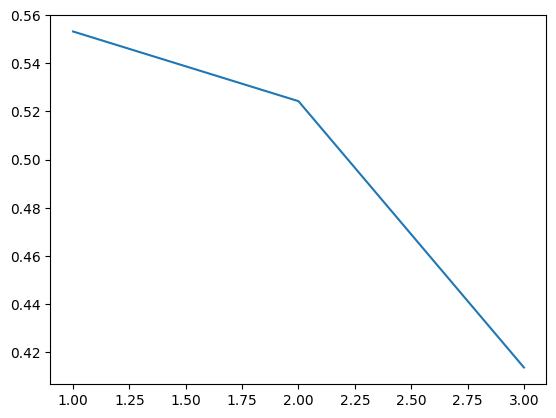

In [ ]:
accuracy = []
test_num = 3
for i in range(test_num):
    gb = GradientBoostingRegressor(max_depth=i + 1).fit(X_train, y_train) 
    y_pred = gb.predict(X_test)
    accuracy.append(gb.score(X_test, y_test))

sns.lineplot(x=range(1, test_num + 1), y=accuracy)


In [ ]:
int(dummy_df.shape[0]/100)

2

In [ ]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = 
                        GradientBoostingRegressor(learning_rate=0.1,
                                                    min_samples_split=int(dummy_df.shape[0]/100),
                                                    min_samples_leaf=int(dummy_df.shape[0]/100),
                                                    max_depth=7,
                                                    max_features='sqrt',
                                                    subsample=0.8,
                                                    random_state=42), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4, iid=False, cv=5)
gsearch1.fit(X_train, y_train)

In [ ]:

class decision_tree():

    def __init__(self):
        self.reg = None

    def pred(self, x):
        if self.reg is None:
            raise ValueError("train the model first")
        else:
            self.reg.predict(x)
        return self.reg.predict(x)

    def decision_tree_on_units(self, x):

        #def y
        y = df[['units']]


        #skip standardization bcs it's unnecessary for tree based models
        #test train split
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        #fit model
        self.reg = DecisionTreeRegressor(max_depth=2, random_state=42)
        self.reg.fit(X_train, y_train)


        preds = self.reg.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        


        print(f"MSE: {mse:.3f}\n")
        print(f"R^2: {r2:.3f}\n")
        print(f"accuracy: {self.reg.score(X_test, y_test):.3f}\n")
        print(self.reg.feature_importances_)







In [ ]:
tree_x1 = decision_tree()
tree_x1.decision_tree_on_units(x1)

MSE: 84074.664

R^2: 0.571

[1.]


In [ ]:
tree_xn = decision_tree()
tree_xn.decision_tree_on_units(dummy_df)

MSE: 71943.707

R^2: 0.633

[0.91537258 0.         0.         0.         0.         0.
 0.08462742 0.         0.         0.         0.         0.
 0.        ]


### price optimization



In [ ]:
def generate_price_data(brand, flavour, price_range, df):


# simulation of price data for Müller and chocolate flavor
    base_case = df.min().copy()
    base_case[brand] = 1
    base_case[flavour] = 1

    price_list = []

    for price in price_range:
        row = base_case.copy()
        row['price'] = price
        price_list.append(row)



    return pd.DataFrame(price_list)
price_df = generate_price_data("brand_Mueller", "flavour_chocolate", np.linspace(1, 10, 100), dummy_df)

       price  brand_Activia  brand_Alnatura  brand_Danone  \
87  8.909091          False           False         False   

    brand_Ecke-Mit-Was-Drin  brand_Ja!  brand_Mueller  brand_Oikos  \
87                    False      False              1        False   

    brand_Rewe  flavour_chocolate  flavour_raspberry  flavour_straciatella  \
87       False                  1              False                 False   

    flavour_strawberry  pred_unit       revenue  
87               False    1146.16  10211.243636  


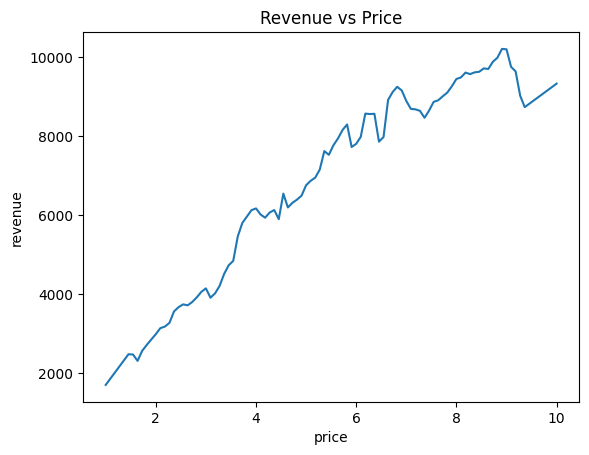

In [ ]:
def revenue_optimize(price_df, model):
    revenue_df = price_df.copy()
    revenue_df['pred_unit'] = model.pred(price_df)
    revenue_df["revenue"] = revenue_df['pred_unit'] * revenue_df['price']
    print(revenue_df.query('revenue == revenue.max()'))
    sns.lineplot(data=revenue_df, x='price', y='revenue')
    plt.title("Revenue vs Price")
revenue_optimize(price_df, rf_xn)

# model comparison for this dataset

### OLS

- linearity v
- endogeneity: can only assume Omitted variables/Simultaneity/Measurement error/ Sample selection bias doesn't exist
- normality and homoscedasticity of residual v
- autocorrelation: if the data are collected from different customers then it's safe otherwise this would lead to underestimate of std
- multicolinearity: price has a high VIF, which leads to inflated standard errors and biased estimation. since we are mainly looking at the effect of price affecting sales, 'volume_per_joghurt_g' and 'packsize' are dropped to increase the price precission even though it decrease adj r squared



### model: random forest

- n_estimators= 100 is the default value to balance of performance and speed A
- Independence of Observations: if the data is not collected from different customer this may lead to overfitting or misleading variable importance. Tree-based methods do not inherently account for autocorrelation... Time-series structure must be explicitly encoded via lag features or temporal validation
- minimal multicollinearity: may split on redundant variables/ misleading importance rankings. Random Forest is not affected by multicollinearity as much as linear regression... though variable importance can be biased.

- however the above 2 problems also affect linear model, and random forest is more robust to them in general. 

### comparing random forest and OLS

- Cross-validation and scoring metrics like MSE or R² can be used to compare the generalization performance of multiple estimators.
- Adjusted R² is not well defined for non-parametric models like Random Forests.
- Standardizing the target variable allows MSE to be interpreted in terms of variance units, but it is no longer in the original units of measurement, making direct interpretability more difficult.
- R² depends only on the squared errors and the total variance, and both scale in the same way under standardization, R² remains unchanged

### other alternatives

- **gradient boosting tree regresssion :**

    potentoal of higher accuracy than random forest, but requires more tuning and is more prone to overfitting

- **GLM :** generalizes OLS by allowing for non-normal dependent variables (e.g., logistic regression, Poisson regression). It is best when the data type itself is different—like counts or proportions.
    - Linearity 
    - No Endogeneity 
    - No Multicollinearity 
    - No Autocorrelation

    specific to GLM compared to OLS:
    - Correct Specification of the Link Functio
    - Correct Specification of the Distribution of the Response Variable (exponential family e.g., Normal, Binomial, Poisson, Gamma, Inverse Gaussian)
    - Some GLMs require handling of an extra dispersion parameter (e.g., in Gamma or quasi-Poisson models).

    difference from OLS, GLM can better handle the below assumptions, but we don't have to worry about them here:
    - Normality and Homoscedasticity of Residuals
        - Normality: GLM assumes that the response variable follows a distribution from the exponential family
        - Homoscedasticity : GLM allows the variance to be a function of the mean, depending on the family 

- **GLS :**  generalizes OLS by relaxing the assumption of homoscedasticity and uncorrelated errors. It is used when the dependent variable is continuous and normally distributed, but errors are problematic (e.g., heteroscedastic or autocorrelated)   
    - Linearity 
    - No Endogeneity 
    - No Multicollinearity 

    specific to GLS compared to OLS:
    - Known or Correctly Specified Error Variance-Covariance Matrix (Ω)
        - use GLS If Ω is known
        - use Feasible GLS if Ω must be estimated

    difference from OLS, GLS can better handle the below assumptions, but we don't have to worry about them here:
    - Normality and Homoscedasticity of Residuals
        - Normality: Not necessary for unbiasedness/consistency, only for inference
        - Homoscedasticity : GLS is used precisely when heteroscedasticity is present
    - No Autocorrelation : GLS is often employed specifically to address autocorrelation 

- **GAM :** Generalized Additive Models 
    - No Endogeneity 
    - No Multicollinearity 
    - No Autocorrelation	

    specific to GAM compared to OLS:
    - Smoothness Selection & Overfitting Control: GAMs require selecting the degree of smoothness for each function (e.g., via penalized likelihood)
    - Basis Function Specification: GAM is sensitive to the choice and number of basis functions used to represent smooth terms.
    - Additivity: GAM assumes that effects of predictors are additive, unless interactions are explicitly modeled.



    difference from OLS, GAM can better handle the below assumptions:
     - Linearity: Predictors are allowed to have non-linear relationships with the response via smooth functions (e.g., splines). 
    - Normality and Homoscedasticity of Residuals
        - Normality: Required only if using Gaussian family, not required for all GAMs (GAMs can use Poisson, binomial, etc.)
        - Homoscedasticity: Assumes variance is correctly modeled via the distribution in the specified family; for Gaussian GAMs, this implies constant variance unless otherwise modeled

    here maybe GAM can fit a better line than OLS, but the difference can't be too drastic based on the graph
